In [1]:
import pandas as pd

#df = pd.read_csv('./Traindata/driving_log.csv')
df = pd.read_csv('./data/driving_log.csv')
df.head()


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


Number of training example =  8036
Image data shape =  (160, 320)


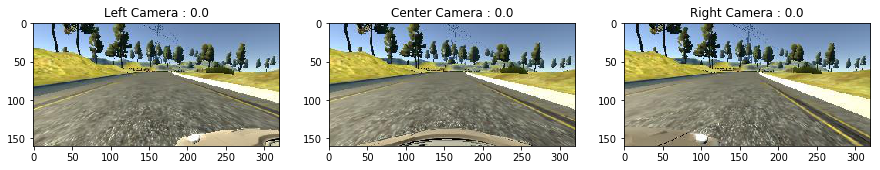

In [2]:
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import random

data_path = './data/'
#data_path = './TrainData/IMG/'
sample_data = df[['center','left','right','steering']]

n_train = len(sample_data)
sample = random.choice(list(range(n_train)))


plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
left_name = data_path + sample_data['left'].values[sample].strip()
image = cv2.imread(left_name)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_shape = image.shape[:2]
plt.title('Left Camera : '+str(sample_data['steering'].values[sample]))
plt.imshow(image)

plt.subplot(1,3,2)
center_name = data_path + sample_data['center'].values[sample].strip()
image = cv2.imread(center_name)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_shape = image.shape[:2]
plt.title('Center Camera : '+str(sample_data['steering'].values[sample]))
plt.imshow(image)

plt.subplot(1,3,3)
right_name = data_path + sample_data['right'].values[sample].strip()
image = cv2.imread(right_name)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_shape = image.shape[:2]
plt.title('Right Camera : '+str(sample_data['steering'].values[sample]))
plt.imshow(image)


print ('Number of training example = ',n_train)
print ("Image data shape = ",image_shape)

In [3]:
control = df[['steering','throttle','brake','speed']]
control.describe()

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


Text(0.5,1,'Original')

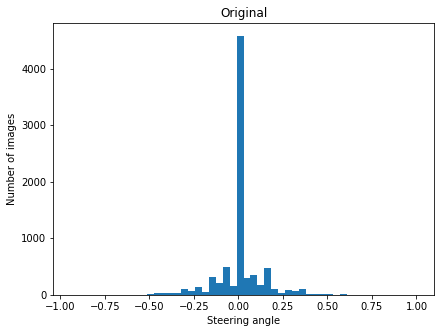

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df['steering'],bins=50)
plt.xlabel('Steering angle')
plt.ylabel('Number of images')
plt.title('Original')


In [5]:
import numpy as np
import tensorflow as tf

def EqualizeHist_brightness(image):
    
    #Applies histogram equilization on V channel of HSV 
    
    image_HSV = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image_HSV[:,:,2] = cv2.equalizeHist(image_HSV[:,:,2])
    image = cv2.cvtColor(image_HSV,cv2.COLOR_HSV2RGB)
    return image

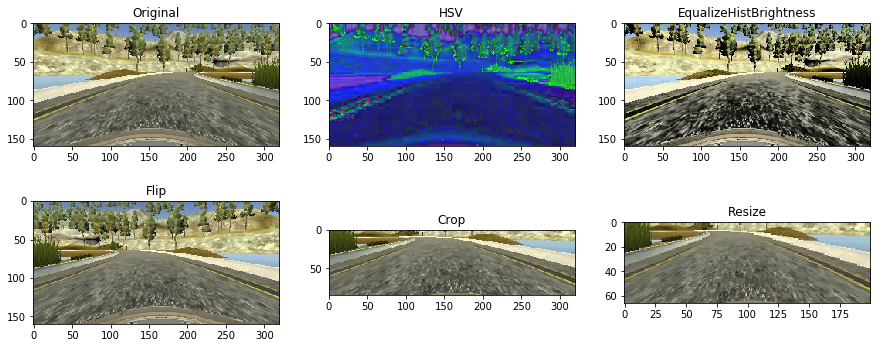

In [6]:
image_index = np.random.choice(len(sample_data))
image_name = data_path + sample_data['center'][image_index].strip()

image = cv2.imread(image_name)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (15,6))

plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(image)

plt.subplot(2,3,2)
image_HSV = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
plt.title('HSV')
plt.imshow(image_HSV)

plt.subplot(2,3,3)
image_brightness = EqualizeHist_brightness(image)
plt.title('EqualizeHistBrightness')
plt.imshow(image_brightness)


plt.subplot(2,3,4)
image_flip = cv2.flip(image,1)
plt.title('Flip')
plt.imshow(image_flip)

plt.subplot(2,3,5)
image_crop = image_flip[55:-20,:]
plt.title('Crop')
plt.imshow(image_crop)

plt.subplot(2,3,6)

resize_image = cv2.resize(image_crop,(200,66),interpolation=cv2.INTER_CUBIC)
plt.title('Resize')
plt.imshow(resize_image)

In [7]:
import math

camera_pos = ['left','center','right']
angle_offset = {'center':0,'left':0.2,'right':0.2}

def get_angle(camera_position,center_angle,image_index):
    
    if camera_position == 'left':
        #left camera 
        left_angle_tan = angle_offset['left'] + math.tan(center_angle)
        angle = math.atan(left_angle_tan)
    elif camera_position == 'right':
        #right camera
        right_angle_tan = math.tan(center_angle) - angle_offset['right'] 
        angle = math.atan(right_angle_tan)
    else:
        angle = center_angle
    
    if angle >= 1.0 :
        angle = 1.0
    elif angle <= -1.0:
        angle = -1.0
       
    
    return angle


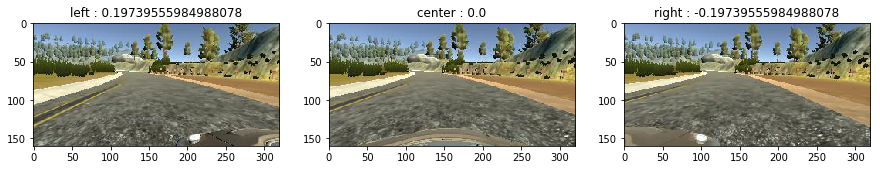

In [8]:
image_index = np.random.choice(len(sample_data))

fig,axes = plt.subplots(1,3,figsize=(15,6))
for i ,ax in zip(range(3),axes):
    center_angle = sample_data['steering'][image_index]
    image_name = data_path + sample_data[camera_pos[i]][image_index].strip()
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax.set_title(camera_pos[i]+" : "+str(get_angle(camera_pos[i],center_angle,image_index)))
    ax.imshow(image)

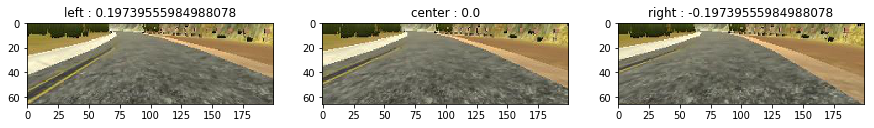

In [9]:
fig,axes = plt.subplots(1,3,figsize=(15,6))
for i ,ax in zip(range(3),axes):
    center_angle = sample_data['steering'][image_index]
    image_name = data_path + sample_data[camera_pos[i]][image_index].strip()
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image[55:-25,:]

    image = resize_image = cv2.resize(image,(200,66),interpolation=cv2.INTER_CUBIC)
    
    ax.set_title(camera_pos[i]+" : "+str(get_angle(camera_pos[i],center_angle,image_index)))
    ax.imshow(image)

In [10]:
X_train_data = []
y_train_data = []

for i in range(n_train):
    
    for j in range(len(camera_pos)):
        image_name = data_path + sample_data[camera_pos[j]][i].strip()
        center_angle = sample_data['steering'][i]
        angel = get_angle(camera_pos[j],center_angle,i)
        X_train_data.append(image_name)
        y_train_data.append(angel)

print ("Num of training : ",len(X_train_data))
    

Num of training :  24108


In [11]:
from scipy.stats import norm

def get_weight(y_train,num_bins=10):
    
    weights_bin = np.zeros(num_bins)
    weights = np.zeros(len(y_train))
    
    nums,bins = np.histogram(y_train,num_bins)    
    prob = norm.pdf(bins,0,0.8)

    for i in range(num_bins):
        if nums[i]:
            weights_bin[i] = prob[i+1]
        else :
            weights_bin[i] = 0
            nums[i] = 1
    
    weights_bin = weights_bin / np.sum(weights_bin)
    weights_bin = weights_bin / nums
    
    bin_index = np.digitize(y_train,bins)
       
    for i in range(len(y_train)):
        if bin_index[i] > num_bins :
            bin_index[i] -= 1
        weights[i] = weights_bin[bin_index[i]-1] 
       
    return weights,prob


1.0


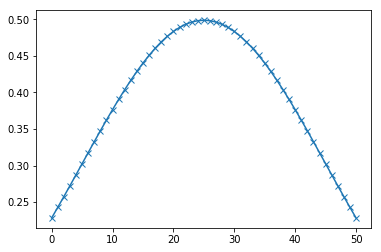

In [12]:
weights,prob= get_weight(y_train = y_train_data,num_bins = 50)

print (np.sum(weights))

plt.plot(prob,'-x')

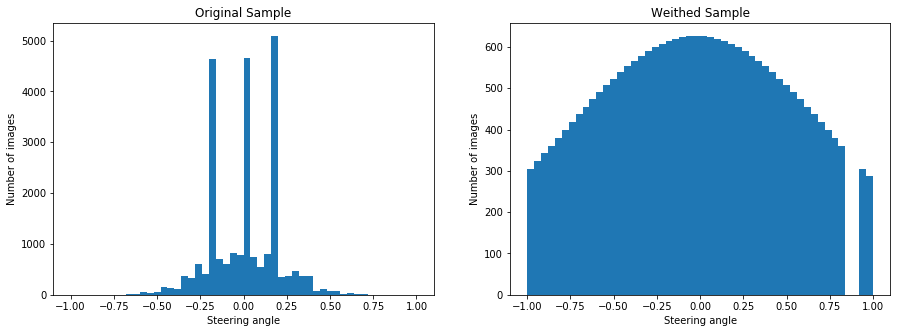

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(y_train_data,bins=50)
plt.xlabel('Steering angle')
plt.ylabel('Number of images')
plt.title('Original Sample')

plt.subplot(1,2,2)
plt.hist(y_train_data,bins=50,weights=weights*len(y_train_data))
plt.xlabel('Steering angle')
plt.ylabel('Number of images')
plt.title('Weithed Sample')
plt.show()

In [14]:
import os
import csv
import cv2
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split

def generator(X_train,y_train,batch_size = 32,augment = False):
    
    num_sample = len (y_train)
    X_train_index = range(num_sample)
    #get the weight of each sample
    weights = np.zeros(len(y_train),dtype = np.float32)
    weights,_ = get_weight(y_train,num_bins=50)
    
    while True:
        X_train_index,X_weights = sklearn.utils.shuffle(X_train_index,weights)
        
        #generate data for each batch 
        for offset in range(0,num_sample,batch_size):
            # select a batch samples base on the weight of each sample
            X_batch_index = np.random.choice(X_train_index,batch_size,replace=True,p=X_weights)
            
            images = np.zeros((len(X_batch_index),160,320,3),dtype = np.float32)
            angles = np.zeros((len(X_batch_index),),dtype = np.float32)

            for i in range(len(X_batch_index)):
                
                image_index = X_batch_index[i]
                
                # original data
                image_name = X_train[image_index]
                image = cv2.imread(image_name)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                angle = y_train[image_index]
                
                # augment data
                if augment :
                    
                    image_name = X_train[image_index]
                    image = cv2.imread(image_name)
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                    angle = y_train[image_index]
                    #Applies histogram equilization on V channel of HSV  
                    if (np.random.choice([0,1]) == 0):
                        image = EqualizeHist_brightness(image)
                    
                    # randomly flip
                    if (np.random.choice([0,1]) == 0):
                        image = cv2.flip(image,1)
                        angle = - angle 
                    
                images[i] = image
                angles[i] = angle
                           
            yield (images,angles)

[-0.52150315 -0.41858438  0.46363819  0.43847078 -0.52150315  0.46360219
  0.53407228  0.14520641  0.19739556 -0.42532143  0.05975719 -0.135712
  0.42697355  0.02177976 -0.19739556  0.49328497]
[ 0.22728783 -0.19739556  0.28291509  0.6863848  -0.03127411 -0.62234074
 -0.08824026  0.15744521  0.7534954  -0.02155582  0.89607823 -0.60046208
  0.59045053  0.7534954   0.24964429 -0.71411264]
[ 0.04262284 -0.71411264  0.72475231  0.72436219 -0.61071807 -0.26311752
  0.56638366 -0.         -0.47193524  0.45198953 -0.70452803  0.36178389
 -0.224425   -0.28084552 -0.13076131 -0.74563062]
[ 0.83195096  0.86494213 -0.73155707  0.21074186  0.10160194 -0.24708466
  0.42054281  0.76921082 -0.28084552  0.28291509  0.         -0.26506248
  0.53787261  0.77183402  0.51329076  1.        ]
[-0.         -0.93586278  0.7534954   0.30097321 -0.63820893  0.93586278
  0.71411264  0.31825653  0.55833048 -0.63820893  0.3444567  -0.80981141
 -0.36178389  0.7534954  -0.89607823 -0.93323809]
[ 0.51781315 -0.496497

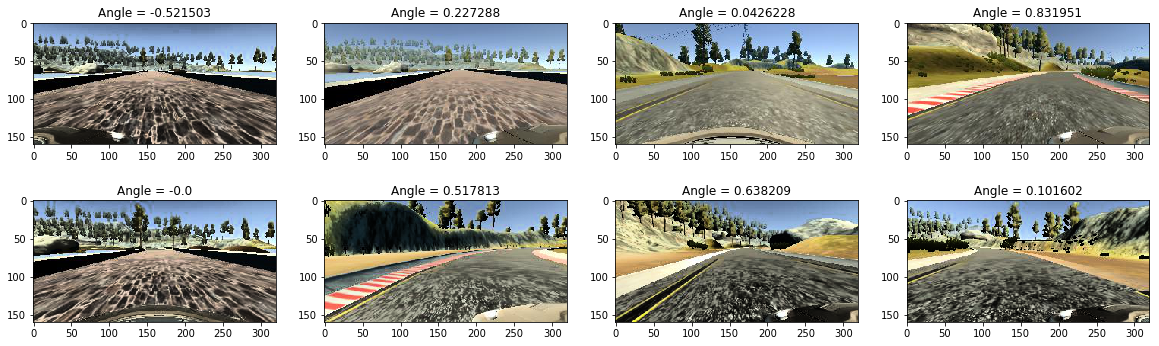

In [15]:
test_gen = generator(X_train_data,y_train_data,batch_size=16,augment=True)

fig,axes = plt.subplots(2,4,figsize=(20,6))
for ax,(image_,angle_) in zip(axes.flatten(),test_gen):
    image = np.array(image_[0],dtype=np.uint8)
    print (angle_)
    ax.set_title("Angle = "+str(angle_[0]))
    ax.imshow(image)

In [16]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Lambda
from keras.layers import Conv2D, MaxPooling2D,Cropping2D
from keras.optimizers import SGD
from keras import regularizers
from keras import backend as K
import tensorflow as tf

# image shape
x_image = (160,320,3)

model = Sequential()

#Cropping
model.add(Cropping2D(cropping = ((55,25),(0,0)),input_shape = x_image))
#resize images
model.add(Lambda(lambda x: tf.image.resize_images(x,(66,200),0)))

#normalize the image data
model.add(Lambda(lambda x: x/255.0 - 0.5))

# Nvidia Model
model.add(Conv2D(24, (5, 5),strides=(2, 2), kernel_initializer='TruncatedNormal',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(36, (5, 5),strides=(2, 2), kernel_initializer='TruncatedNormal',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(48, (5, 5),strides=(2, 2), kernel_initializer='TruncatedNormal',activation='relu',kernel_regularizer=regularizers.l2(0.01)))

model.add(Conv2D(64, (3, 3), kernel_initializer='TruncatedNormal',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(64, (3, 3), kernel_initializer='TruncatedNormal',activation='relu',kernel_regularizer=regularizers.l2(0.01)))


model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation = 'tanh'))

model.compile(loss = 'mean_squared_error',optimizer = 'adam')

Using TensorFlow backend.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 80, 320, 3)        0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
__________

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


sample_data = np.stack((X_train_data,y_train_data),axis = 1)

#split sample data to training data and validation data
sample_data = shuffle(sample_data,random_state = 8)
train_data,validation_data = train_test_split(sample_data,test_size = 0.2)
#training data
X_train = train_data[:,0]
y_train = np.float64(train_data[:,1])
#validation data
X_valid = validation_data[:,0]
y_valid = np.float64(validation_data[:,1])

train_gen = generator(X_train,y_train,batch_size = 64,augment = True)
valid_gen = generator(X_valid,y_valid,batch_size = 64,augment = False)

print ("Number of training :",len(X_train))
print ("Number of validation :",len(X_valid))


Number of training : 19286
Number of validation : 4822


In [19]:
history_object = model.fit_generator(generator=train_gen,steps_per_epoch = 2000,epochs = 10,
                                     validation_data = valid_gen,validation_steps = 400,verbose=1)

Epoch 1/10
2000/2000 [==============================] - 1231s 616ms/step - loss: 0.0746 - val_loss: 0.0387
Epoch 2/10
2000/2000 [==============================] - 1056s 528ms/step - loss: 0.0214 - val_loss: 0.0287
Epoch 3/10
2000/2000 [==============================] - 1161s 580ms/step - loss: 0.0220 - val_loss: 0.0214
Epoch 4/10
2000/2000 [==============================] - 1566s 783ms/step - loss: 0.0210 - val_loss: 0.0211
Epoch 5/10
2000/2000 [==============================] - 1417s 709ms/step - loss: 0.0205 - val_loss: 0.0210
Epoch 6/10
2000/2000 [==============================] - 1266s 633ms/step - loss: 0.0200 - val_loss: 0.0214
Epoch 7/10
2000/2000 [==============================] - 1405s 703ms/step - loss: 0.0203 - val_loss: 0.0198
Epoch 8/10
2000/2000 [==============================] - 1207s 603ms/step - loss: 0.0213 - val_loss: 0.0273
Epoch 9/10
2000/2000 [==============================] - 1264s 632ms/step - loss: 0.0201 - val_loss: 0.0211
Epoch 10/10
2000/2000 [==============

In [20]:
model.save('model.h5')
print ("Saved model !")

Saved model !


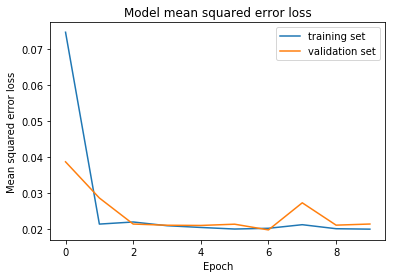

In [21]:
# show training loss and validation loss
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])

plt.title('Model mean squared error loss')
plt.ylabel('Mean squared error loss')
plt.xlabel('Epoch')
plt.legend(['training set','validation set'],loc='upper right')
plt.show()

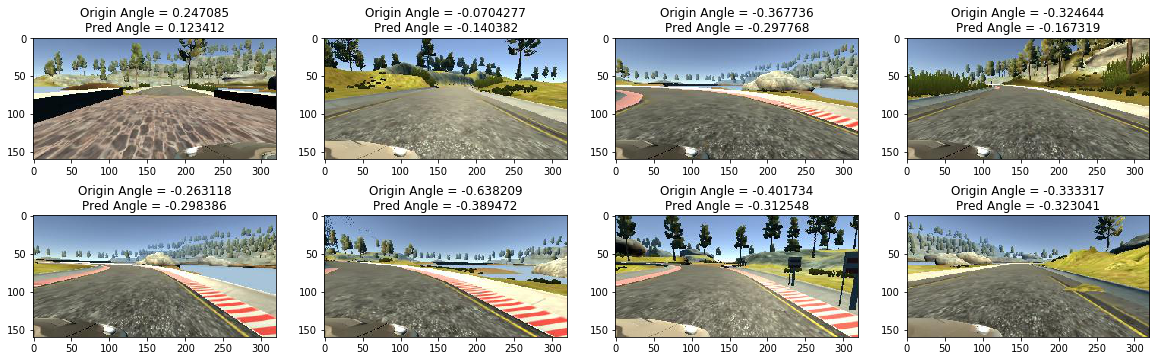

In [22]:
# model predict
test_gen_pred = generator(X_valid,y_valid,batch_size=16,augment = False)

fig,axes = plt.subplots(2,4,figsize=(20,6))
for ax,(image_,angle_) in zip(axes.flatten(),test_gen_pred):
    image = np.array(image_[0],dtype=np.uint8)
    image_ = np.expand_dims(image,axis = 0)
    #print (np.shape(image_))
    pred = model.predict(image_)
    ax.set_title("Origin Angle = "+str(angle_[0])+'\n'+"Pred Angle = " + str(pred[0][0]))
    ax.imshow(image)